In [123]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [124]:
#change file directory
%cd "C:\Users\aless\Documents\434\Python Code\Data"

C:\Users\aless\Documents\434\Python Code\Data


C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [125]:
#Read in csv data
va_unemployment = pd.read_csv("gatti_VAUR.csv")
va_laborforce = pd.read_csv("gatti_VALFPR.csv")
va_employees = pd.read_csv("gatti_VALEIH.csv")

### Graphing Unemployment Rate and # of Leisure and Hospitality Employees

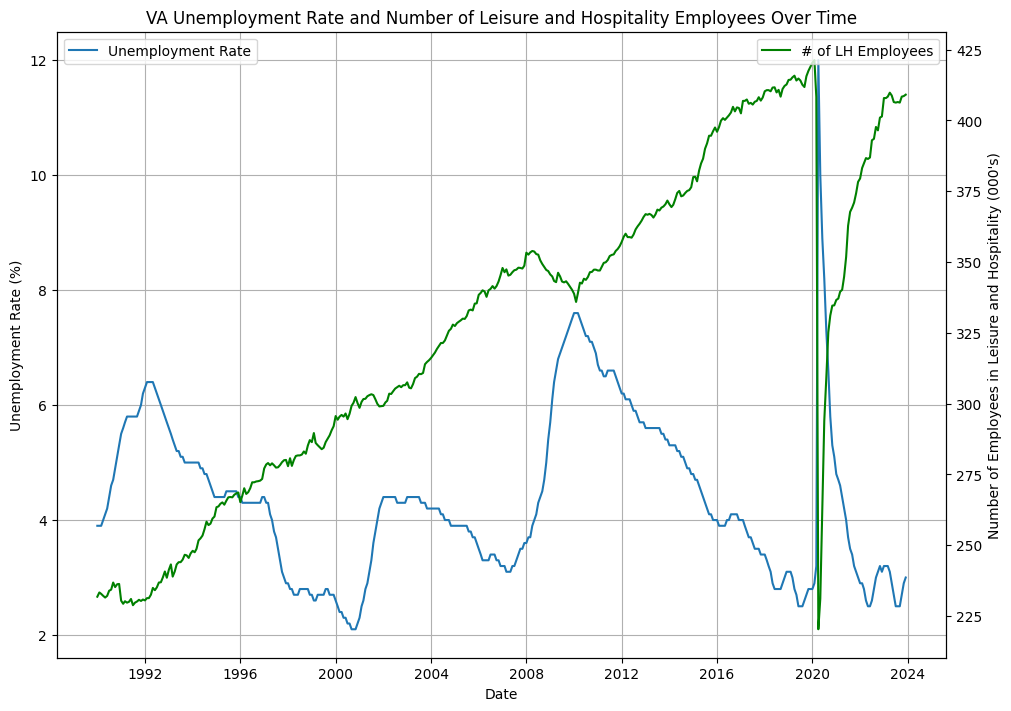

In [126]:
#merge unemployment and all employees dataframes
unemployment_employees = va_unemployment.merge(va_employees, on="DATE")
#change type of the 'DATE' column to datetime
unemployment_employees['DATE'] = pd.to_datetime(unemployment_employees['DATE'])
#create the graph
fig, unemployment_employees_plot = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
unemployment_employees_plot2 = unemployment_employees_plot.twinx()
unemployment_employees_plot.plot(unemployment_employees.DATE, unemployment_employees.VAUR, label='Unemployment Rate')
unemployment_employees_plot2.plot(unemployment_employees.DATE, unemployment_employees.VALEIH, label='# of LH Employees', color="green")
#add grid lines
unemployment_employees_plot.grid(True)
#add labels
unemployment_employees_plot.set_ylabel('Unemployment Rate (%)')
unemployment_employees_plot2.set_ylabel('Number of Employees in Leisure and Hospitality (000'+"'"+"s)")
unemployment_employees_plot.set_xlabel('Date')
unemployment_employees_plot.set_title('VA Unemployment Rate and Number of Leisure and Hospitality Employees Over Time')
#add legend
unemployment_employees_plot.legend(loc='upper left')
unemployment_employees_plot2.legend(loc='upper right')

### Scatter Plot of Unemployment Rate and Labor Force Participation Rate

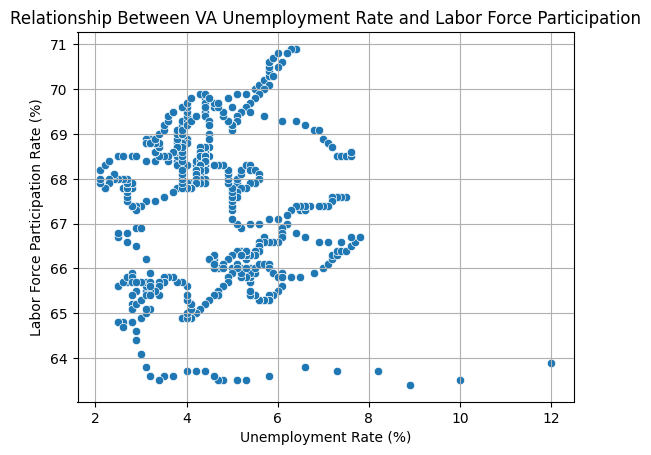

In [127]:
#merge unemployment and labor force participation rate dataframes
unemployment_laborforce = va_unemployment.merge(va_laborforce, on="DATE")
#change type of the 'DATE' column to datetime
unemployment_laborforce['DATE'] = pd.to_datetime(unemployment_laborforce['DATE'])
#create scatter plot
sns.scatterplot(data=unemployment_laborforce, x="VAUR", y="LBSSA51")
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Labor Force Participation Rate (%)')
plt.title('Relationship Between VA Unemployment Rate and Labor Force Participation')
plt.grid(True)

### Correlation Analysis - Unemployment and Labor Force Participation

In [128]:
#change column names for easy reading
unemployment_laborforce.rename(columns={'VAUR':'VA Unemployment Rate', 'LBSSA51':'VA LF Participation Rate'}, inplace=True)
#calculate correlation and level of significance
unemployment_laborforce_corr = unemployment_laborforce[['VA Unemployment Rate', 'VA LF Participation Rate']]
corrp = unemployment_laborforce_corr.iloc[:, 0:2].rcorr(stars=False, decimals=6)
print(corrp)

                         VA Unemployment Rate VA LF Participation Rate
VA Unemployment Rate                        -                 0.795209
VA LF Participation Rate            -0.010838                        -


C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


### Correlation Analysis - Monthly % Change in Unemployment and % change in Leisure & Hospitality Employees

In [129]:
#calculate monthly percentage change for unemployment and employees and add as columns
unemployment_employees['Unemployment_pct_change'] = unemployment_employees['VAUR'].pct_change() * 100
unemployment_employees['LHEmployees_pct_change'] = unemployment_employees['VALEIH'].pct_change() * 100
#calculate correlation and level of significance
unemployment_employees_corr = unemployment_employees[['Unemployment_pct_change', 'LHEmployees_pct_change']]
corrp2 = unemployment_employees_corr.iloc[:, 0:2].rcorr(stars=False, decimals=6)
print(corrp2)

                        Unemployment_pct_change LHEmployees_pct_change
Unemployment_pct_change                       -               0.000000
LHEmployees_pct_change                -0.916166                      -


C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1118: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(lambda x: ffp(x, precision=decimals))


In [130]:
#save the data to a new txt file
combined_corrp = pd.concat([corrp, corrp2])
combined_corrp.to_csv('gatti_correlation_analysis.csv')